In [1]:
import sys
import numpy as np
sys.path.append("..")
sys.path.append("../src")

# 1. Tensor to voigt conversion and voigt to tensor conversion

In [2]:
import tensor_conversion

In [60]:
cij_forsterite = np.array([[320.5,  68.15,  71.6,     0,     0,     0],
  [ 68.15,  196.5,  76.8,     0,     0,     0],
  [  71.6,   76.8, 233.5,     0,     0,     0],
  [   0,      0,      0,     64,     0,     0],
  [   0,      0,      0,      0,    77,     0],
  [   0,      0,      0,      0,     0,  78.7]])

cij_opx = np.array([[  236.90,   79.60,   63.20,    0.00,    0.00,    0.00],
  [    79.60,  180.50,   56.80,    0.00,    0.00,    0.00],
  [    63.20,   56.80,  230.40,    0.00,    0.00,    0.00],
  [     0.00,    0.00,    0.00,   84.30,    0.00,    0.00],
  [     0.00,    0.00,    0.00,    0.00,   79.40,    0.00],
  [     0.00,    0.00,    0.00,    0.00,    0.00,   80.10]])
cij_cpx = np.array([[  228.10,   78.80,   70.20,    0.00,    7.90,    0.00],
  [    78.80,  181.10,   61.10,    0.00,    5.90,    0.00],
  [    70.20,   61.10,  245.40,    0.00,   39.70,    0.00],
  [     0.00,    0.00,    0.00,   78.90,    0.00,    6.40],
  [     7.90,    5.90,   39.70,    0.00,   68.20,    0.00],
  [     0.00,    0.00,    0.00,    6.40,    0.00,   78.10]])

In [61]:
rho_fo = 3355
rho_opx = 3306
rho_cpx = 3286

In [64]:
cij = cij_cpx
density = rho_cpx

In [65]:
tensor = tensor_conversion.voigt_to_tensor(cij)

print(np.array(tensor))

[[[[228.1   0.    7.9]
   [  0.   78.8   0. ]
   [  7.9   0.   70.2]]

  [[  0.   78.1   0. ]
   [ 78.1   0.    6.4]
   [  0.    6.4   0. ]]

  [[  7.9   0.   68.2]
   [  0.    5.9   0. ]
   [ 68.2   0.   39.7]]]


 [[[  0.   78.1   0. ]
   [ 78.1   0.    6.4]
   [  0.    6.4   0. ]]

  [[ 78.8   0.    5.9]
   [  0.  181.1   0. ]
   [  5.9   0.   61.1]]

  [[  0.    6.4   0. ]
   [  6.4   0.   78.9]
   [  0.   78.9   0. ]]]


 [[[  7.9   0.   68.2]
   [  0.    5.9   0. ]
   [ 68.2   0.   39.7]]

  [[  0.    6.4   0. ]
   [  6.4   0.   78.9]
   [  0.   78.9   0. ]]

  [[ 70.2   0.   39.7]
   [  0.   61.1   0. ]
   [ 39.7   0.  245.4]]]]


In [66]:
voigt = tensor_conversion.tensor_to_voigt(tensor)

In [68]:
print(np.array(voigt))

print(voigt == cij)

[[228.1  78.8  70.2   0.    7.9   0. ]
 [ 78.8 181.1  61.1   0.    5.9   0. ]
 [ 70.2  61.1 245.4   0.   39.7   0. ]
 [  0.    0.    0.   78.9   0.    6.4]
 [  7.9   5.9  39.7   0.   68.2   0. ]
 [  0.    0.    0.    6.4   0.   78.1]]
[[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]]


In [69]:
cijkl = tensor_conversion.voigt_to_tensor(voigt)
print(np.array(cijkl))
print(cijkl == tensor)

[[[[228.1   0.    7.9]
   [  0.   78.8   0. ]
   [  7.9   0.   70.2]]

  [[  0.   78.1   0. ]
   [ 78.1   0.    6.4]
   [  0.    6.4   0. ]]

  [[  7.9   0.   68.2]
   [  0.    5.9   0. ]
   [ 68.2   0.   39.7]]]


 [[[  0.   78.1   0. ]
   [ 78.1   0.    6.4]
   [  0.    6.4   0. ]]

  [[ 78.8   0.    5.9]
   [  0.  181.1   0. ]
   [  5.9   0.   61.1]]

  [[  0.    6.4   0. ]
   [  6.4   0.   78.9]
   [  0.   78.9   0. ]]]


 [[[  7.9   0.   68.2]
   [  0.    5.9   0. ]
   [ 68.2   0.   39.7]]

  [[  0.    6.4   0. ]
   [  6.4   0.   78.9]
   [  0.   78.9   0. ]]

  [[ 70.2   0.   39.7]
   [  0.   61.1   0. ]
   [ 39.7   0.  245.4]]]]
True


# 2. Tensor rotation

In [70]:
import tensor_rotation
import tensor_rotation_opt
import tensor_conversion
from get_rotations import EulerAngles

In [71]:
ctfobj = EulerAngles("ebsd.ctf")
fors = ctfobj.get_euler_angles(3)
print(fors)

          Euler1    Euler2    Euler3
0        87.5076   93.1102  189.1320
1        87.3375   93.1639  189.7950
2        88.4146   93.2878    9.2332
3        87.3717   93.0185  189.1343
4       111.5864  140.3801  352.8077
...          ...       ...       ...
907295   41.5073  141.0764  264.8889
907296  111.8848  109.0588   37.2396
907297   84.6482  116.7861   25.1183
907298   83.9147  116.9559  204.6882
907299   84.4206  131.8797  322.1264

[907300 rows x 3 columns]


In [72]:
from datetime import datetime
now = datetime.now()
print(now)

2023-11-27 17:55:03.580916


In [73]:
tensor_list = []
tensor = tensor_conversion.voigt_to_tensor(cij)
counter = 0
for i in range(len(fors)):
    alpha = fors.iloc[i]["Euler1"]
    beta = fors.iloc[i]["Euler2"]
    gamma = fors.iloc[i]["Euler3"]
    output = np.array(tensor_rotation_opt.rotate_tensor(tensor, alpha, beta, gamma))
#     print(output)
    output = output/len(fors)
#     print(f"Counter: {counter}")
#     counter +=1
    tensor_list.append(output)

In [74]:
print(now)

2023-11-27 17:55:03.580916


In [75]:
print("efefefe")
now = datetime.now()
print(now)

efefefe
2023-11-27 17:57:15.955831


In [76]:
tensor_sum = np.sum(tensor_list, axis=0)

In [77]:
# import numpy as np
# import pandas as pd

# tensor = tensor_conversion.voigt_to_tensor(cij_forsterite)

# alpha = 30 # Rotation angle around x axis in degrees
# beta = 50 # Rotation angle around y axis in degrees
# gamma = 80    # Rotation angle around z axis in degrees
# output = tensor_rotation.rotate_tensor(tensor, alpha, beta, gamma)

In [78]:
print("__________________")
now = datetime.now()
print(now)

__________________
2023-11-27 17:57:16.219805


In [79]:
print(np.shape(tensor_sum))

(3, 3, 3, 3)


In [80]:
import pandas as pd
print("Output rotated tensor in voigt matrix convention:")
print(pd.DataFrame(np.array(tensor_conversion.tensor_to_voigt(tensor_sum))))

Output rotated tensor in voigt matrix convention:
            0           1           2          3          4          5
0  223.019432   69.807192   72.596450  -0.624198   0.474349  -1.477512
1   69.807192  210.521772   67.552317  -0.876101   0.252092  -1.205556
2   72.596450   67.552317  221.346879  -0.970392  -0.530079   0.104382
3   -0.624198   -0.876101   -0.970392  73.889398   0.248836   0.187203
4    0.474349    0.252092   -0.530079   0.248836  75.476868   0.175843
5   -1.477512   -1.205556    0.104382   0.187203   0.175843  75.689693


# 3. Calculating Christoffel tensors

In [81]:
import christoffel

In [82]:
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])
# M = tensor_sum
# import tensor_conversion
# tensor_M = tensor_conversion.voigt_to_tensor(M)
stiffness = tensor_sum
direction = np.array([1, 0, 0])
density = density
christoffel_t = christoffel.christoffel_tensor(stiffness, direction)
wave_moduli, velocities, polarization_directions = christoffel.wave_properties(christoffel_t, density)
print("Christoffel tensor:")
print(christoffel_t)
print("Wave moduli:")
print(wave_moduli)
print("Velocities:")
print(velocities)
print("Polarization directions:")
print(polarization_directions)

Direction:  [1. 0. 0.]
Christoffel tensor:
[[ 2.23019432e+02 -1.47751212e+00  4.74349031e-01]
 [-1.47751212e+00  7.56896931e+01  1.75843431e-01]
 [ 4.74349031e-01  1.75843431e-01  7.54768679e+01]]
Wave moduli:
[223.03576107312, 75.78142887870207, 75.36880278455374]
Velocities:
[0.26052743979807946, 0.15186147554173623, 0.15144747214194212]
Polarization directions:
[[ 0.99994464  0.00700526 -0.00785146]
 [-0.01002312  0.86123477 -0.50810847]
 [ 0.00320252  0.50815903  0.8612573 ]]


# 4. Calculating velocity

In [83]:
import christoffel_wave_prop

In [84]:
import numpy as np
import tensor_conversion
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9
M = tensor_sum*10**9

cijkl = M
rho = density

# Calculate vp, vs1 and vs2 over all the directions possible
vp, vs1, vs2 = christoffel_wave_prop.phase_velocity(cijkl, rho)
# Print vp, vs1 and vs2
print("The values of vp are:")
print("Min Vp: ", min(vp)/1000)
print("Max Vp: ", max(vp)/1000)
print("The values of vs1 are:")
print("Min Vs1: ", min(vs1)/1000)
print("Max Vs1: ", max(vs1)/1000)
print("The values of vs2 are:")
print("Min Vs2: ", min(vs2)/1000)
print("Max Vs2: ", max(vs2)/1000)

The values of vp are:
Min Vp:  7.994469412040404
Max Vp:  8.267327769122401
The values of vs1 are:
Min Vs1:  4.7434857733058164
Max Vs1:  4.814467104144065
The values of vs2 are:
Min Vs2:  4.725603465808637
Max Vs2:  4.797391991177877


# 5. Anisotropy plot

/Users/usin8611/Documents/codes_anisotropy/anisotropy/notebooks/../src/cijkl_2dplots_vp.py:73: UserWarning: FixedFormatter should only be used together with FixedLocator
  cb.ax.set_yticklabels(['{:.1f}'.format(v) for v in cb.get_ticks()])


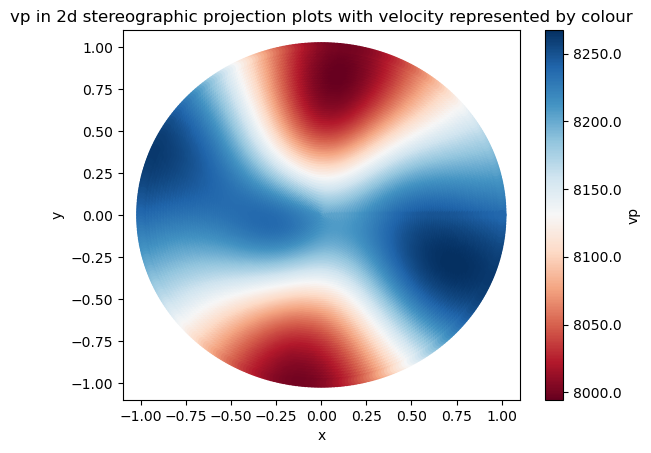

In [85]:
import tensor_conversion
# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
import cijkl_2dplots_vp
# M = np.array([[198.96,   73.595,  68.185,   0.,      9.735,   0.   ],
#                 [ 73.595, 155.94,   62.23,    0.,      6.295,   0.   ],
#                 [ 68.185,  62.23,  225.99,    0.,     33.85,    0.   ],
#                 [  0.,      0.,      0.,     65.66,    0.,      6.415],
#                 [  9.735,   6.295,  33.85,    0.,     60.23,    0.   ],
#                 [  0.,      0.,     0.,      6.415,   0.,     65.18 ]])*10**9

M = tensor_sum*10**9

cijkl = M

rho = density

# Plot the phase velocity in 2d stereographic projection plots with velocity represented by colour
cijkl_2dplots_vp.plot_vp_2d(cijkl, rho)